In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
TIMESTEPS = 10
TRAINING_EXAMPLES = 10000
TESTING_EXAMPLES = 1000
SAMPLE_GAP = 0.01

def generate_data(seq):
    X = []
    y = []
    for i in range(len(seq) - TIMESTEPS):
        X.append([seq[i: i + TIMESTEPS]])
        y.append([seq[i + TIMESTEPS]])
        
    return np.array(X), np.array(y)

In [3]:
test_start = (TRAINING_EXAMPLES + TIMESTEPS) * SAMPLE_GAP
test_end = test_start + (TESTING_EXAMPLES + TIMESTEPS) * SAMPLE_GAP

train_X, train_y = generate_data(np.sin(np.linspace(0, test_start, TRAINING_EXAMPLES + TIMESTEPS)))
test_X, test_y = generate_data(np.sin(np.linspace(test_start, test_end, TESTING_EXAMPLES + TIMESTEPS)))

train_X.shape

(10000, 1, 10)

In [4]:
train_X[0]

array([[0.        , 0.01000083, 0.02000066, 0.0299985 , 0.03999333,
        0.04998416, 0.05996999, 0.06994982, 0.07992266, 0.0898875 ]])

In [5]:
train_set = tf.data.Dataset.from_tensor_slices((train_X, train_y))
test_set = tf.data.Dataset.from_tensor_slices((test_X, test_y))

BATCH_SIZE = 64
train_set = train_set.batch(BATCH_SIZE).shuffle(TRAINING_EXAMPLES).repeat()
test_set = test_set.batch(BATCH_SIZE)

## LSTM层
参数：
* **units**：隐藏层节点数
* **return_sequences**：
    * **True**：返回所有神经元的输出，即返回一个序列
    * **False**：只返回最后一个神经元的输出

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units=30, input_shape=[1, 10], return_sequences=True),
    tf.keras.layers.LSTM(units=30),
    tf.keras.layers.Dense(units=1)
])

model.summary()

model.compile(loss='mse',
             optimizer='adam',
             metrics=['mse'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 30)             4920      
_________________________________________________________________
lstm_1 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dense (Dense)                (None, 1)                 31        
Total params: 12,271
Trainable params: 12,271
Non-trainable params: 0
_________________________________________________________________


In [7]:
history = model.fit(train_set,
                   epochs=100,
                   steps_per_epoch=int(np.ceil(TRAINING_EXAMPLES / float(BATCH_SIZE))),
                   verbose=1)

Epoch 1/100
157/157 [==============================] - 4s 26ms/step - loss: 0.1231 - mse: 0.1236
Epoch 2/100
157/157 [==============================] - 1s 5ms/step - loss: 0.0042 - mse: 0.0042
Epoch 3/100
157/157 [==============================] - 1s 6ms/step - loss: 0.0034 - mse: 0.0033
Epoch 4/100
157/157 [==============================] - 1s 5ms/step - loss: 0.0024 - mse: 0.0024
Epoch 5/100
157/157 [==============================] - 1s 6ms/step - loss: 0.0022 - mse: 0.0021
Epoch 6/100
157/157 [==============================] - 1s 6ms/step - loss: 0.0019 - mse: 0.0018
Epoch 7/100
157/157 [==============================] - 1s 6ms/step - loss: 0.0017 - mse: 0.0017
Epoch 8/100
157/157 [==============================] - 1s 6ms/step - loss: 0.0016 - mse: 0.0016
Epoch 9/100
157/157 [==============================] - 1s 6ms/step - loss: 0.0014 - mse: 0.0013
Epoch 10/100
157/157 [==============================] - 1s 6ms/step - loss: 0.0013 - mse: 0.0013
Epoch 11/100
157/157 [================

In [8]:
pre = model.predict(test_set)
pre

array([[-0.3195615 ],
       [-0.31005543],
       [-0.30052423],
       [-0.29096887],
       [-0.2813904 ],
       [-0.27178985],
       [-0.26216817],
       [-0.25252628],
       [-0.24286515],
       [-0.2331857 ],
       [-0.22348884],
       [-0.21377543],
       [-0.20404641],
       [-0.19430256],
       [-0.18454476],
       [-0.1747738 ],
       [-0.16499053],
       [-0.1551957 ],
       [-0.14539008],
       [-0.13557447],
       [-0.12574962],
       [-0.1159162 ],
       [-0.106075  ],
       [-0.09622668],
       [-0.08637196],
       [-0.07651152],
       [-0.06664602],
       [-0.05677616],
       [-0.04690257],
       [-0.03702593],
       [-0.02714686],
       [-0.01726603],
       [-0.00738407],
       [ 0.00249839],
       [ 0.0123807 ],
       [ 0.02226222],
       [ 0.03214233],
       [ 0.04202039],
       [ 0.05189574],
       [ 0.06176774],
       [ 0.07163575],
       [ 0.08149908],
       [ 0.09135711],
       [ 0.10120914],
       [ 0.11105448],
       [ 0

In [9]:
pre = pre.squeeze()
test_y = test_y.squeeze()
rmse = np.sqrt((pre - test_y) ** 2).mean(axis=0)
rmse

0.004318802257876967

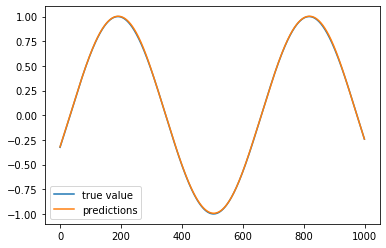

In [10]:
plt.figure()
plt.plot(test_y, label='true value')
plt.plot(pre, label='predictions')
plt.legend()
plt.show()